(-0.5, 191.5, 191.5, -0.5)

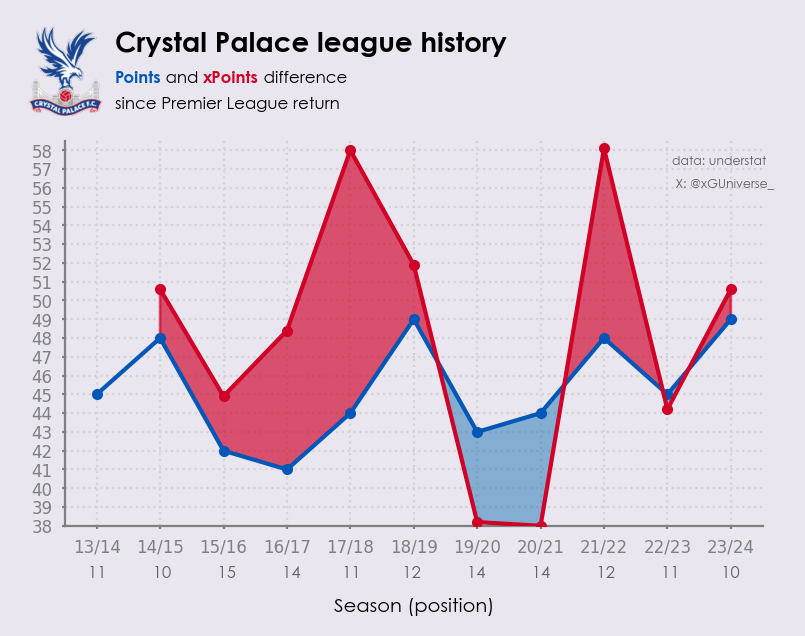

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text
from PIL import Image
import urllib.request


# Load your data
var = pd.read_excel(r'crystalpalace.xlsx')

# Create a single plot with a given size and DPI
fig = plt.figure(figsize=(4.5, 2.5), dpi=200, facecolor="#e9e6ef")

# Create a single set of axes
ax = fig.add_subplot(111, facecolor="#e9e6ef")

# Set the axes properties
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
ax.grid(visible=True, lw=0.8, ls=":", color="lightgrey")
ax.tick_params(
    color="grey", length=1, which="major", labelsize=6, labelcolor="grey", zorder=3, 
)

# Plot the data
line_1 = ax.plot(var['season'], var['pts'], color="#0057B8", label='Pts', zorder=4,  marker='.')
line_2 = ax.plot(var['season'], var['xpts'], color="#d00027", label='xPts', zorder=4,  marker='.')

# Set x and y limits
ax.set_ylim(38, 58.5)

# Fill between the lines
ax.fill_between(
    var.index,
    var['pts'],
    var['xpts'],
    where=var['pts'] >= var['xpts'],
    interpolate=True,
    alpha=0.5,
    zorder=3,
)
ax.fill_between(
    var.index,
    var['pts'],
    var['xpts'],
    where=var['xpts'] >= var['pts'],
    interpolate=True,
    color = '#d00027',
    alpha=0.65,
    zorder=3,
)

# Set major tick locators
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# Set axis labels
plt.xlabel('Season (position)', font='Century Gothic', color='black', size=7, labelpad=15, )

# Add title and subtitle
fig_text(
    x = 0.18, y = 1.1,
    s = "Crystal Palace league history",
    color = "black",
    family = "Century Gothic",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.18, y = 1.02,
    s = "<Points> and <xPoints> difference \nsince Premier League return",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    family = "Century Gothic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.8, y = 0.85,
    s = "data: understat\n X: @xGUniverse_",
    color = "#636061",
    size = 4.5,
    ha = "left",
    va = "top",
    family = "Century Gothic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.15, y = 0.03,
    s = "11          10          15          14         11         12          14          14          12          11         10",
    color = "#636061",
    size = 6,
    ha = "left",
    va = "top",
    family = "Century Gothic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

# Add the club logo
logo_ax = fig.add_axes([0.035, 0.93, 0.18, 0.18], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}9826.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

# Show the plot
#plt.show()
#plt.savefig('crystalpalace.png', dpi=1200, bbox_inches = 'tight')